#**Segmentação de Clientes** 
###Modelo voltado para o depto. de Markenting onde é possível segmentar os clientes de acordos com algumas informações financeiras.

A Base de dados utilizada para esse modelo está disponível no Kaggle: [link](https://www.kaggle.com/arjunbhasin2013/ccdata)

---
###Descrições das informações da Base de Dados:

* CUST ID : Identificação do cliente

* BALANCE : Saldo para fazer compras

* BALANCE FREQUENCY : Frequência que o saldo é atualizado (1 = frequente, 0 = não frequente)

* PURCHASES : Quantidade de compras realizadas

* ONEOFF PURCHASES : Quantidade de compras feitas "de uma só vez"(sem parcelar)

* INSTALLMENTS PURCHASES : Quantidade de compras parceladas

* CASH ADVANCE : Dinheiro adiantado

* PURCHASES FREQUENCY : Frequência das compras(entre 1 e 0)

* ONEOFF PURCHASES FREQUENCY : Frequência das comrpas à vista (entre 1 e 0)

* PURCHASES INSTALLMENTS FREQUENCY : Frequência de compras parceladas (entre 1 e 0)

* CASH ADVANCE FREQUENCY : Frequência de saques de dinheiro adiantado

* CASH ADVANCE TRX : Número de transações feitas como "Cash in Advance"

* PURCHASES TRX : Número de compras

* CREDIT LIMIT : Limite do cartão de crédito

* PAYMENTS : Valor pago

* MINIMUM_PAYMENTS : Valor mínimo pago

* PRCFULLPAYMENT : Percentual de pagamentos de fatura "completa"

* TENURE : Posse do titular do cartão

##Importando as bibliotecas e preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

##Importando Dataset do Kaggle

In [2]:
from google.colab import drive
import zipfile

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keziacampos","key":"fb777bff4cd61a6cf28ff4f007611871"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 47.5MB/s]


In [8]:
!unzip ccdata.zip

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [9]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf8')

##Analisando o Dataset

In [10]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.shape

(8950, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

A princípio consegue-se observar que **quase** não existe valores nulos no Dataset.

Porém, visto que as colunas **CREDIT_LIMIT** e **MINIMUM_PAYMENTS** não apresenta os números totais (que é 8950) de não nulos como as outras colunas entende-se que tem valores nulos.

Relação dos dados do Dataset apresentada abaixo:
* Total
* Média
* Mediana
* Valor minímo
* 25%
* 50%
* 75%
* Valor máximo

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Analisando o cliente que fez a **maior** compra á vista no cartão:

In [14]:
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Analisando o cliente que saca o **maior** valor no cartão de crédito:

In [15]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [16]:
df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


##Visualização e exploração dos dados

O atributo apresentado abaixo, está indicando que existe valores nulos o uqe nao estava apresentando acima nos registros.

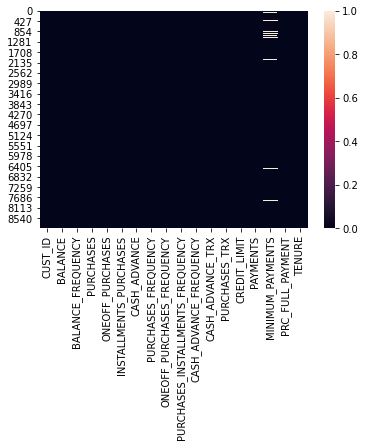

In [17]:
sns.heatmap(df.isnull());

Abaixo, é apresentado no campo "True" onde estaria sendo identificado o valor nulo:

In [18]:
df.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Com isso, conforme apresentado acima, no total o Dataset possui **314** campos nulos.

In [20]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [21]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

##Removendo os valores nulos do Dataset

In [22]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [23]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

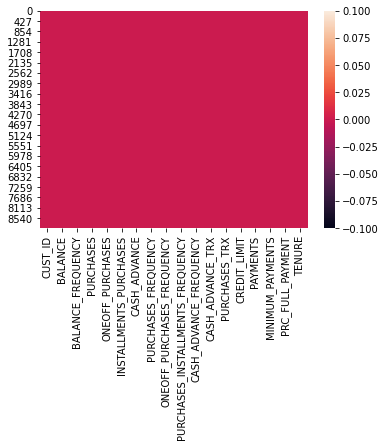

In [24]:
sns.heatmap(df.isnull());

In [25]:
#Verificando caso haja valores repetidos no Dataset
df.duplicated().sum()

0

##Removendo colunas desnecessárias

In [26]:
df.drop('CUST_ID', axis=1, inplace=True)

In [27]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##Visualização e exploração de dados

In [28]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [29]:
len(df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

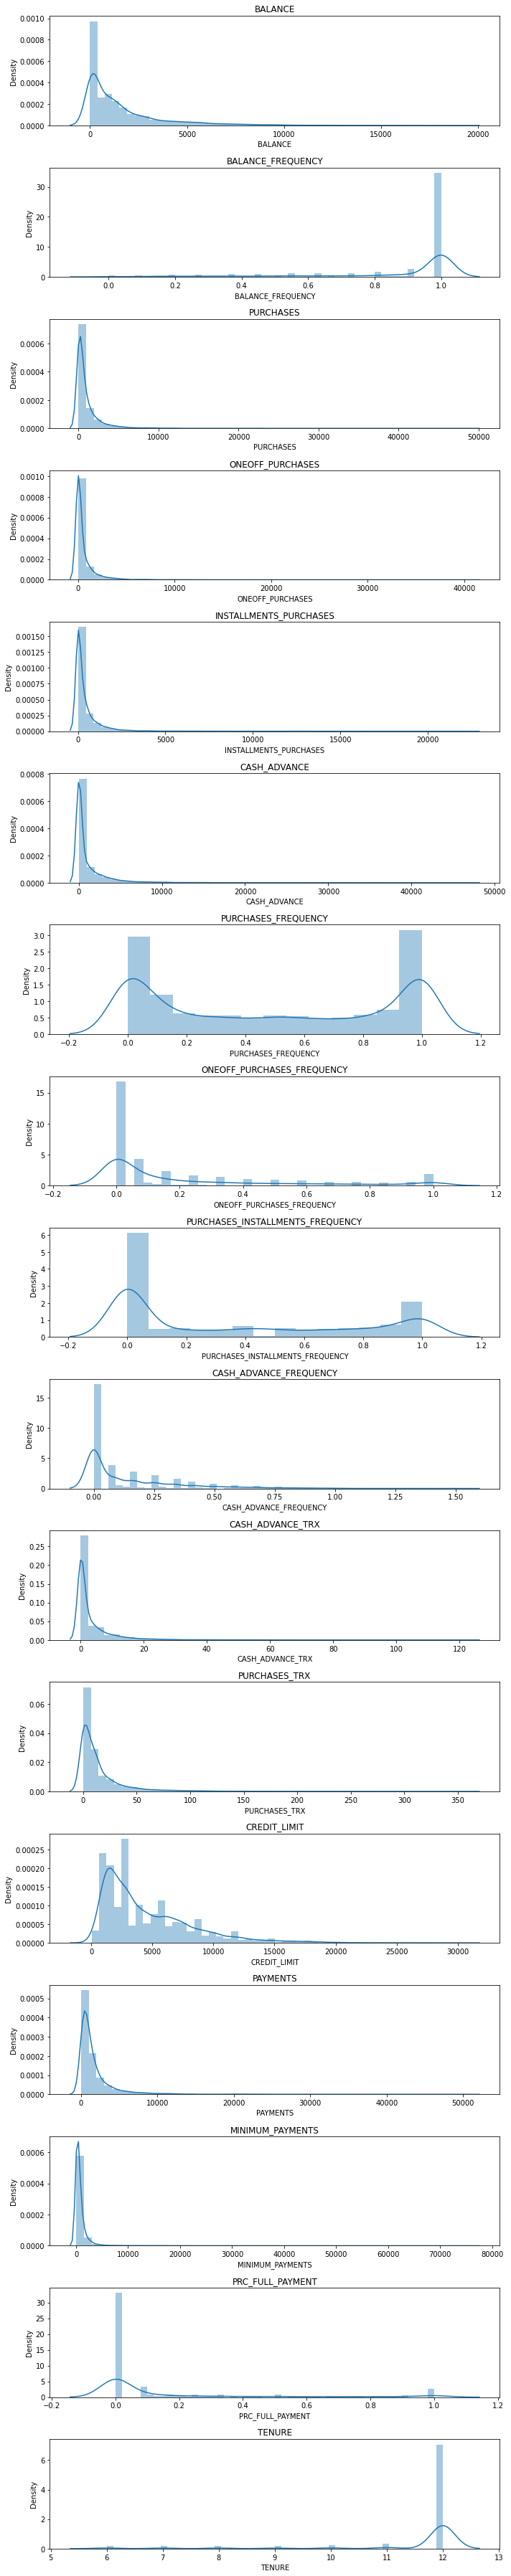

In [30]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])
plt.tight_layout();

In [31]:
correlations = df.corr()

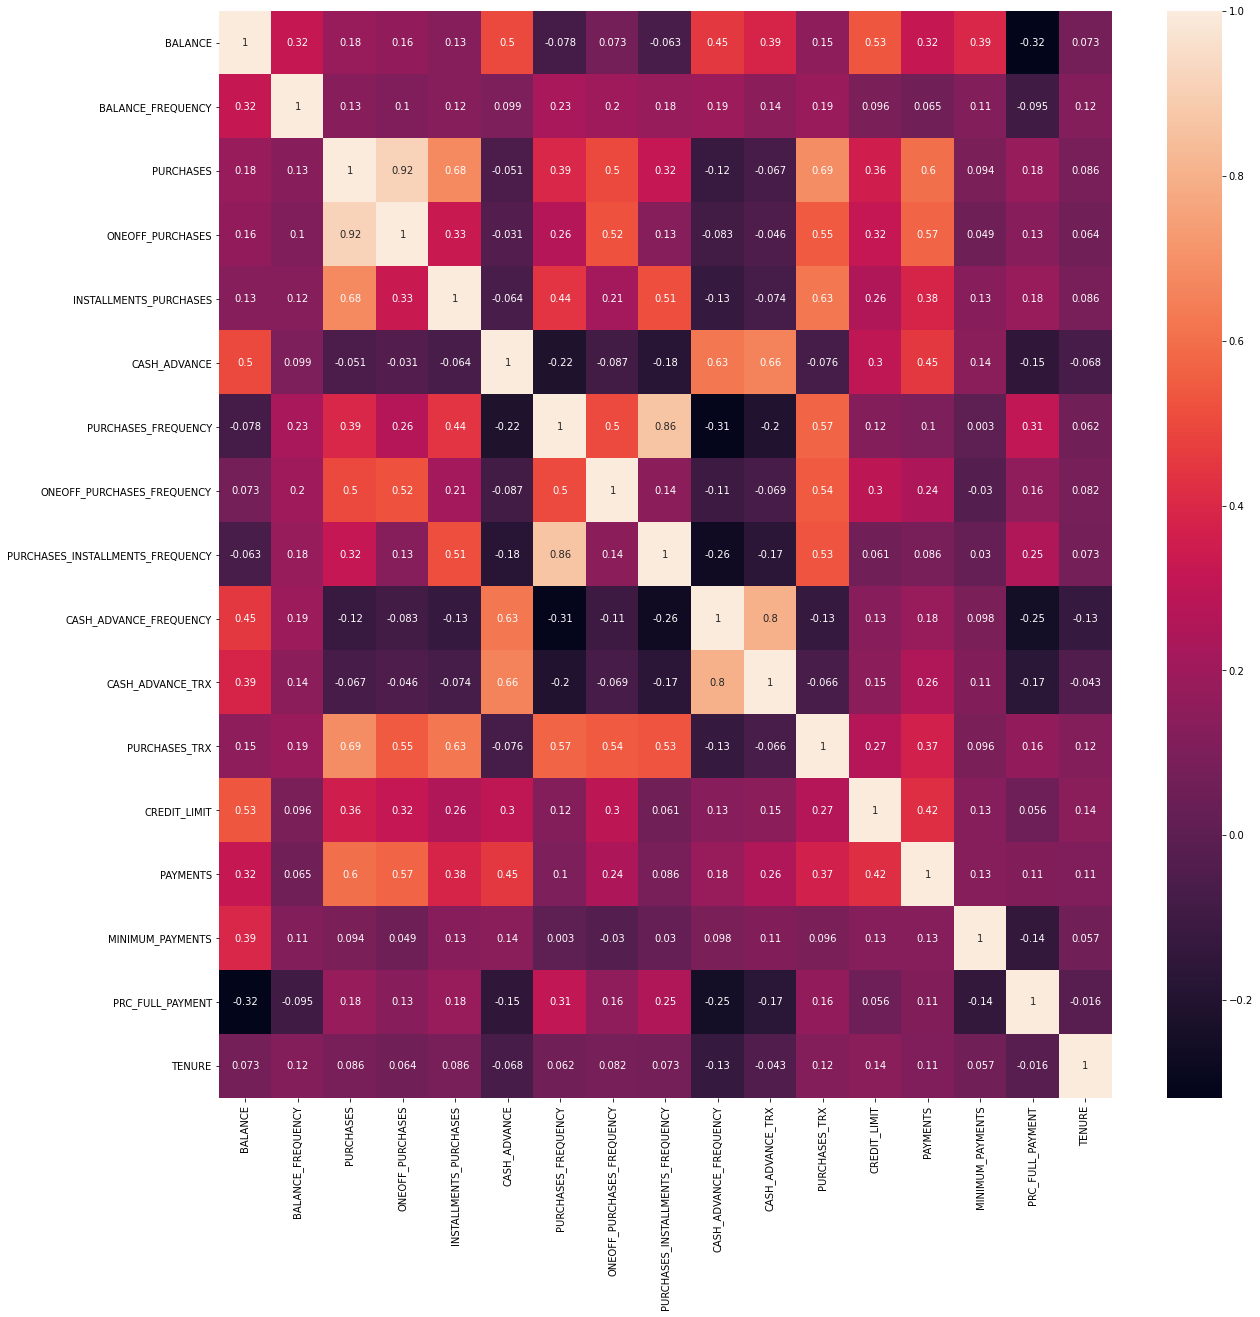

In [32]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

**Acima, a matriz apresenta qual atributo está correlacionado com um outro.**

Quanto **mais próximo do valor 1**, mais forte é a correlação entre os atributos.

Dessa forma, analisando as informações acima e considerando os maiores correlacionados podemos observar o seguinte:

(purchases) -> (oneoff_purchases)

(purchases_instalments_frequency) -> (cash_advance_trx)

(cash_advance_trx) -> (cash_advance_frequency)

##Definição do número de clusters usando o Elbow Method

O método elbow é conhecido como método do cotovelo. Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters. Podemos ver esse “cotovelo” quando plotamos seus resultados em um gráfico.

A partir do valor indicado pelo “cotovelo” no gráfico significa que não existe ganho em relação ao aumento de clusters.

Fonte: [RPubs](https://rpubs.com/diascodes/770518)

**Distorção:** É calculada como a média das distâncias quadradas dos centros dos respectivos clusters. Normalmente, a métrica de distância euclidiana é usada.

**Inércia:** É a soma das distâncias quadradas das amostras ao centro do cluster mais próximo.

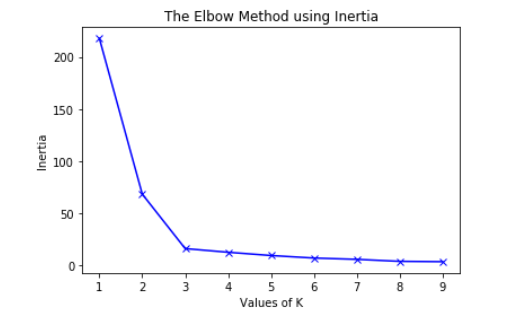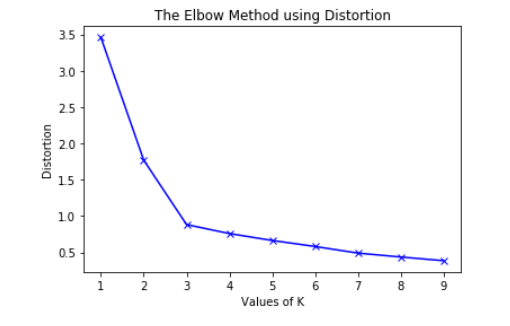

In [33]:
min(df['BALANCE']), max(df['BALANCE'])

(0.0, 19043.13856)

In [34]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [35]:
type(df_scaled), type(df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [36]:
min(df_scaled[0]), max(df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [37]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Será trabalhado com 20 Clusters

In [38]:
wcss_1=[]
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  wcss_1.append(kmeans.inertia_)

In [39]:
print(wcss_1)

[152150.00000000003, 127784.96467079496, 111986.61341063924, 99073.93826774822, 91513.37453463733, 84852.59400226279, 79532.40973829046, 74624.7164396365, 69831.82047561806, 66478.95918238856, 63637.86783950237, 61401.70874220792, 59145.47105665488, 57499.4221122453, 56251.180624431225, 54580.01283437733, 53193.91325435729, 52014.179166313676, 50624.312686522455]


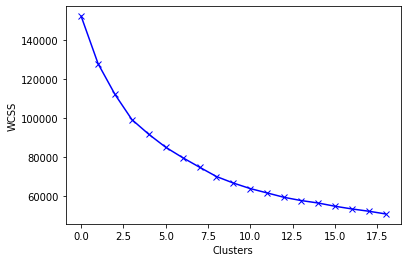

In [40]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Analisando o gráfico acima:
O número ideal de clusters é entre 4 e 8 clusters.

**Como isso foi identificado?**

São os pontos onde começa a curva e termina a curva do gráfico.

##Agrupamento com k-means

In [41]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [42]:
labels, len(labels)

(array([0, 5, 1, ..., 2, 2, 2], dtype=int32), 8950)

In [43]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2769, 1119,  626, 2016,   23,  883,  330, 1184]))

In [44]:
kmeans.cluster_centers_

array([[ 7.28315165e-03,  4.04203388e-01, -3.54190601e-01,
        -2.38905904e-01, -3.98457607e-01, -9.99193883e-02,
        -8.40969353e-01, -3.83085431e-01, -7.50800576e-01,
         9.34489651e-02, -3.56682633e-02, -4.77640070e-01,
        -3.06683775e-01, -2.51949997e-01, -1.31478849e-02,
        -4.54814067e-01,  2.73784759e-01],
       [-1.21857513e-01,  4.03109428e-01,  5.64973188e-01,
         6.84705174e-01,  7.77445058e-02, -3.32601079e-01,
         9.98872271e-01,  1.91423519e+00,  2.15262394e-01,
        -4.18726991e-01, -3.33855335e-01,  6.59581328e-01,
         4.65822012e-01,  1.63075916e-01, -1.56076362e-01,
         4.60104643e-01,  2.74536459e-01],
       [-3.34901439e-01, -3.49885235e-01, -2.87298367e-01,
        -2.12974259e-01, -2.87679154e-01,  6.80198997e-02,
        -2.03948289e-01, -2.84236496e-01, -2.27466186e-01,
         3.07808330e-01, -1.79210756e-04, -3.87811550e-01,
        -5.62208511e-01, -3.91666335e-01, -2.08921003e-01,
         1.27483622e-02, -3.1

In [45]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007283,0.404203,-0.354191,-0.238906,-0.398458,-0.099919,-0.840969,-0.383085,-0.750801,0.093449,-0.035668,-0.477640,-0.306684,-0.251950,-0.013148,-0.454814,0.273785
1,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465822,0.163076,-0.156076,0.460105,0.274536
2,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
3,-0.357965,0.332433,-0.029606,-0.240593,0.371813,-0.362520,0.997057,-0.380677,1.208315,-0.471903,-0.359553,0.195249,-0.259534,-0.213084,-0.029779,0.313067,0.255413
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,1.671554,0.390965,-0.220860,-0.157055,-0.233748,1.994510,-0.481496,-0.211898,-0.421828,1.909575,1.914640,-0.270219,1.013879,0.811164,0.547173,-0.391667,0.072107
6,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
7,-0.700877,-2.137091,-0.309691,-0.234294,-0.301706,-0.322766,-0.552479,-0.440575,-0.438122,-0.521893,-0.376564,-0.418027,-0.174468,-0.201632,-0.256966,0.284727,0.202901


In [46]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1579.634093,0.973023,246.471156,195.902503,50.747375,769.335488,0.152829,0.088176,0.066050,0.153844,3.005417,2.837486,3378.608403,1003.773299,833.565951,0.020689,11.883713
1,1310.838700,0.972764,2210.278758,1728.907721,481.371037,281.391112,0.891246,0.773511,0.449988,0.051353,0.970509,31.104558,6189.300512,2205.232650,500.477164,0.288287,11.884718
2,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
3,819.401487,0.956021,939.952078,193.102063,747.293110,218.649226,0.890518,0.088894,0.844653,0.040712,0.795139,19.562996,3550.158830,1116.287417,794.807299,0.245281,11.859127
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,5043.673813,0.969887,531.334700,331.757486,199.692356,5161.451433,0.297103,0.139244,0.196792,0.517270,16.314836,7.993205,8183.357356,4081.385540,2139.369978,0.039159,11.613817
6,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
7,105.658418,0.371014,341.544831,203.556740,138.238767,302.015981,0.268614,0.071026,0.190316,0.030708,0.679054,4.319257,3859.661693,1149.438393,265.357443,0.236993,11.788851


##Perfil de cada grupo apresentado acima:

- **Grupo 0 (VIP/Prime):** limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- **Grupo 3:** Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- **Grupo 5:** usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- **Grupo 7 (clientes novos):** clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [47]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


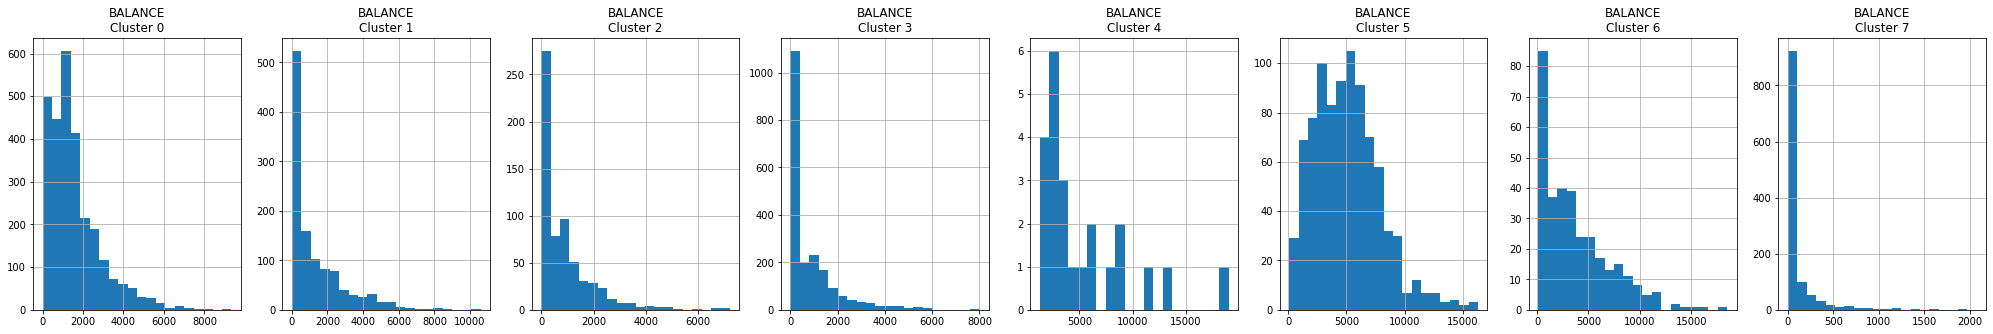

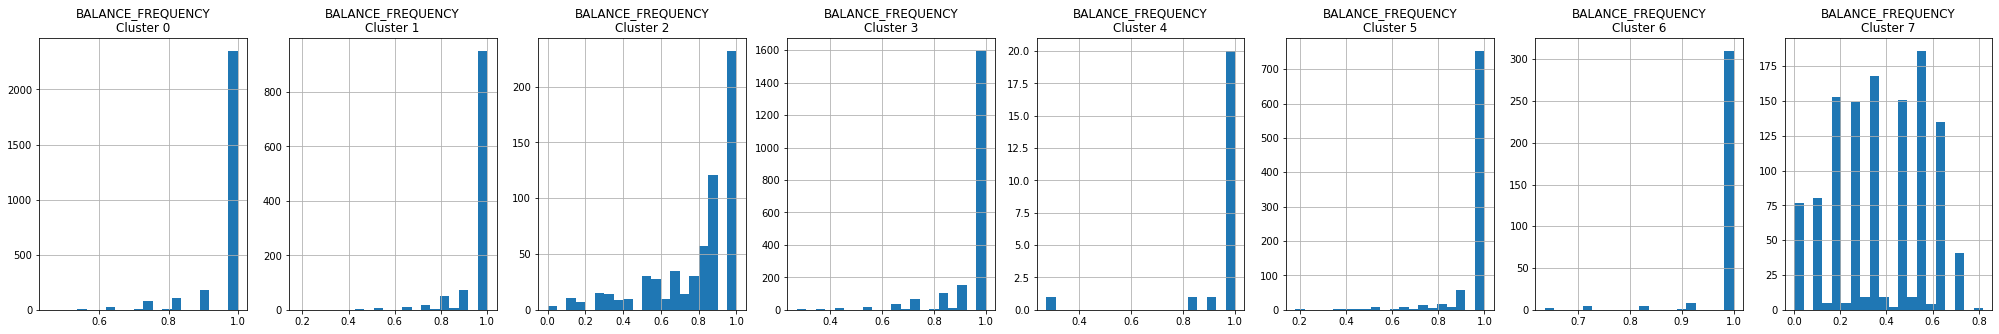

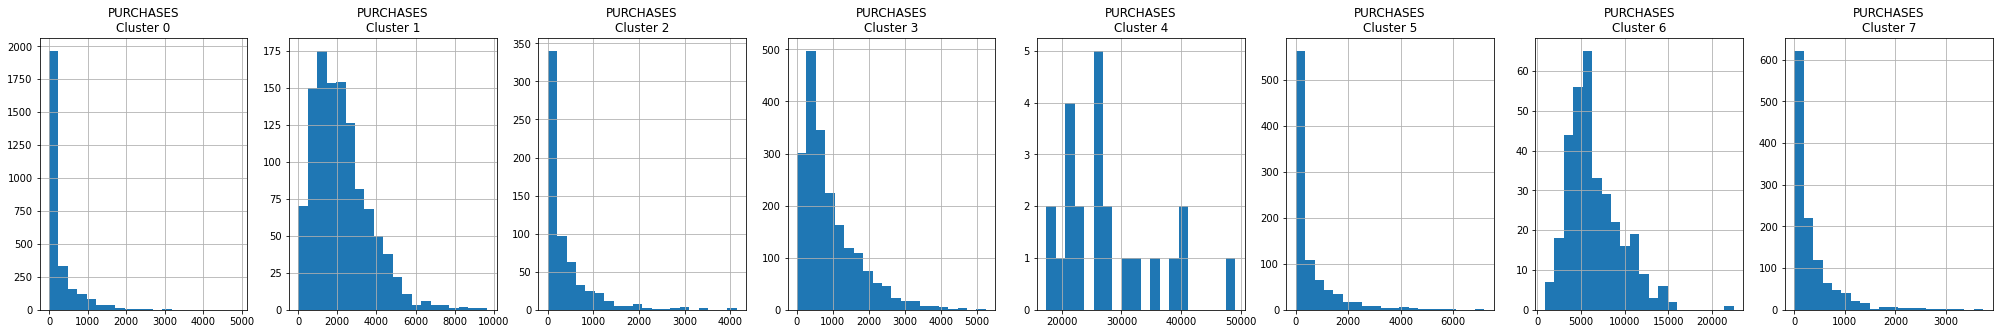

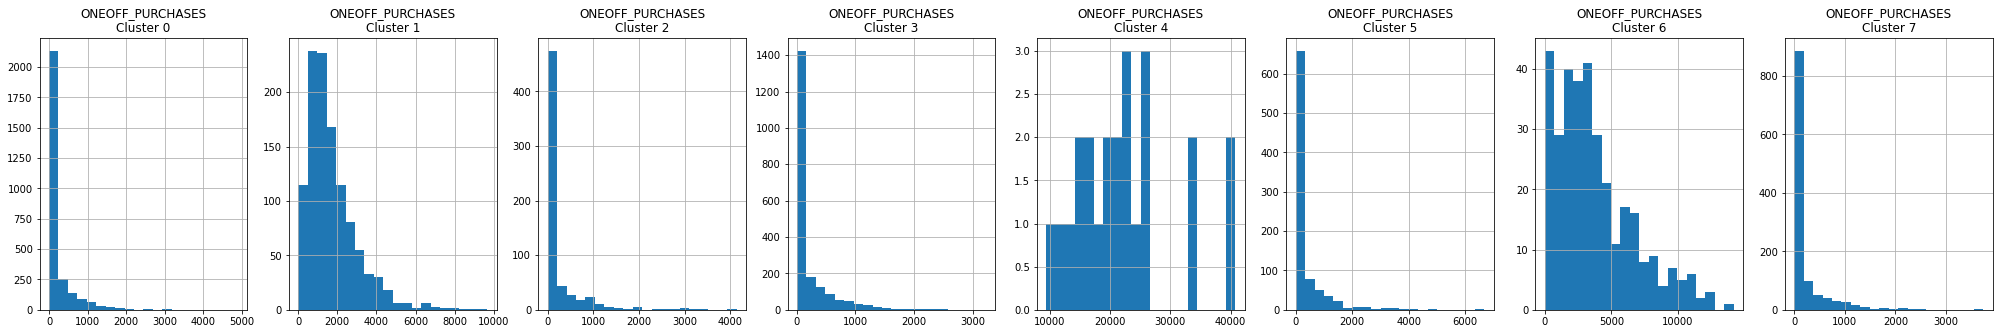

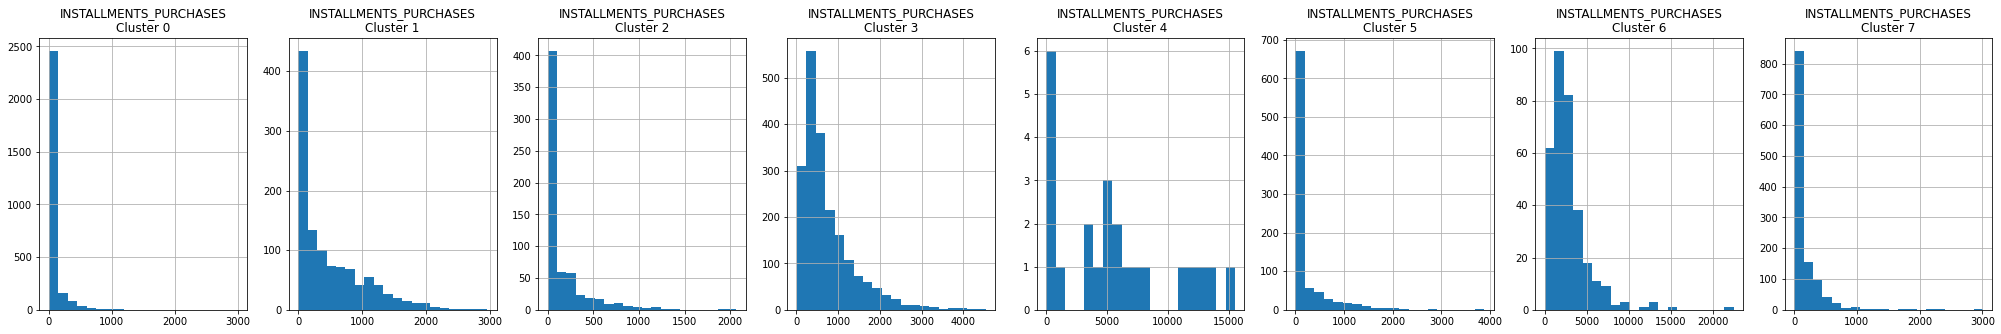

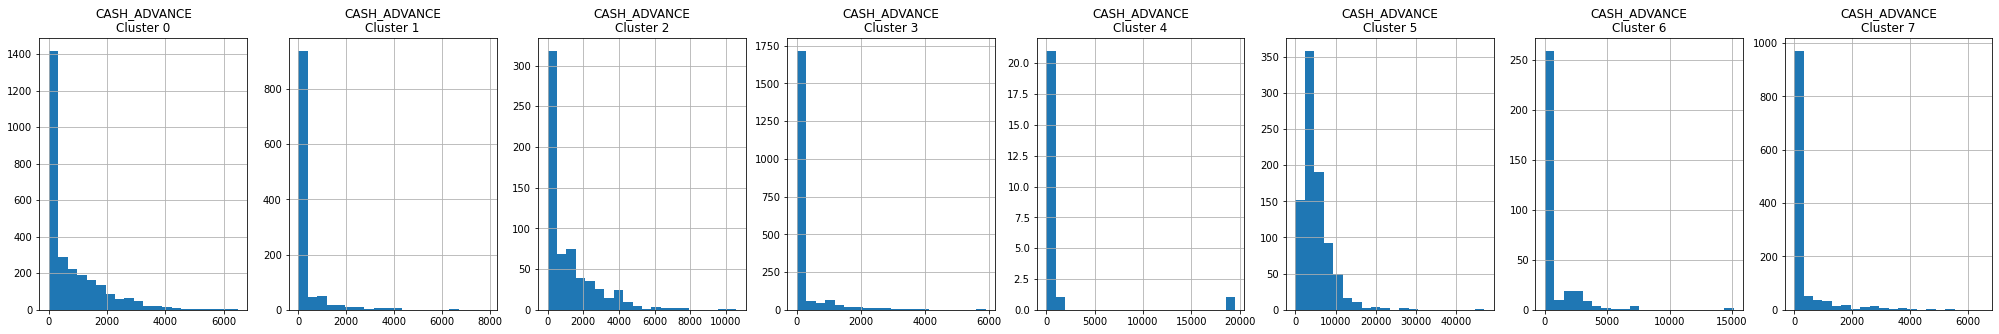

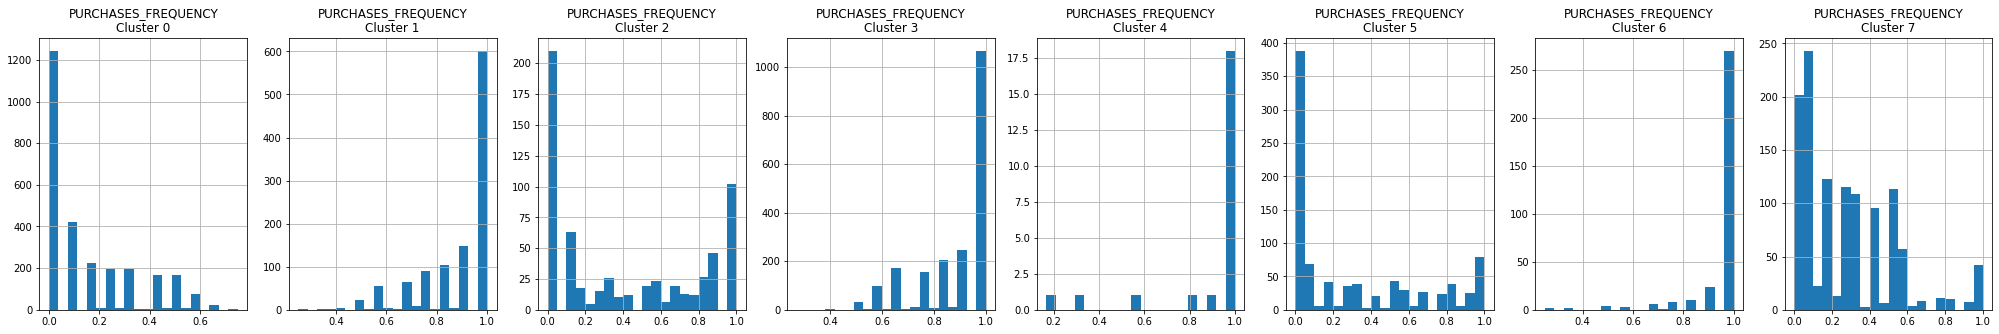

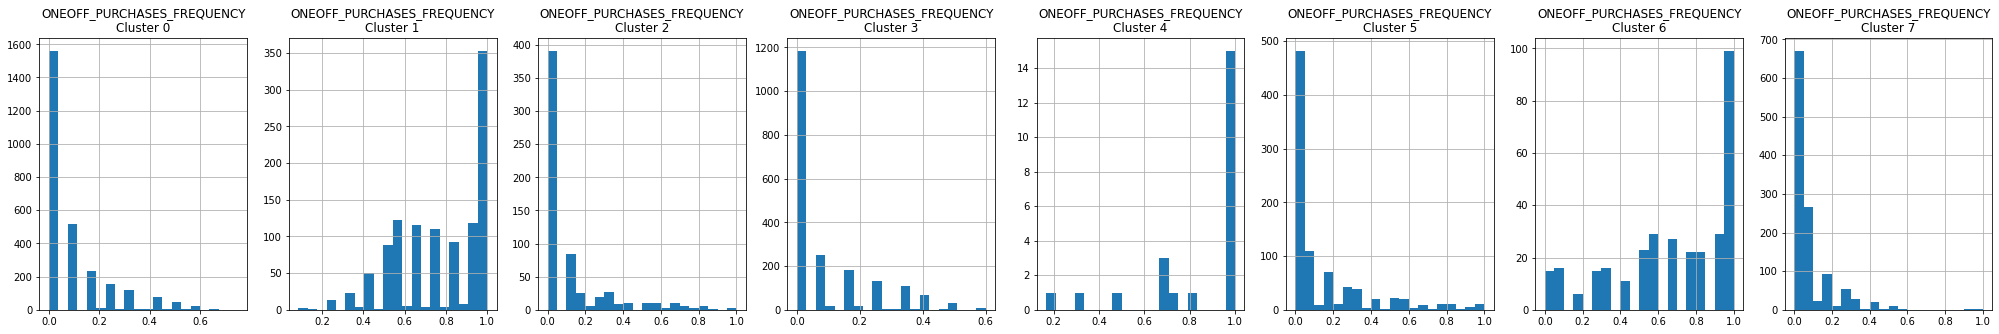

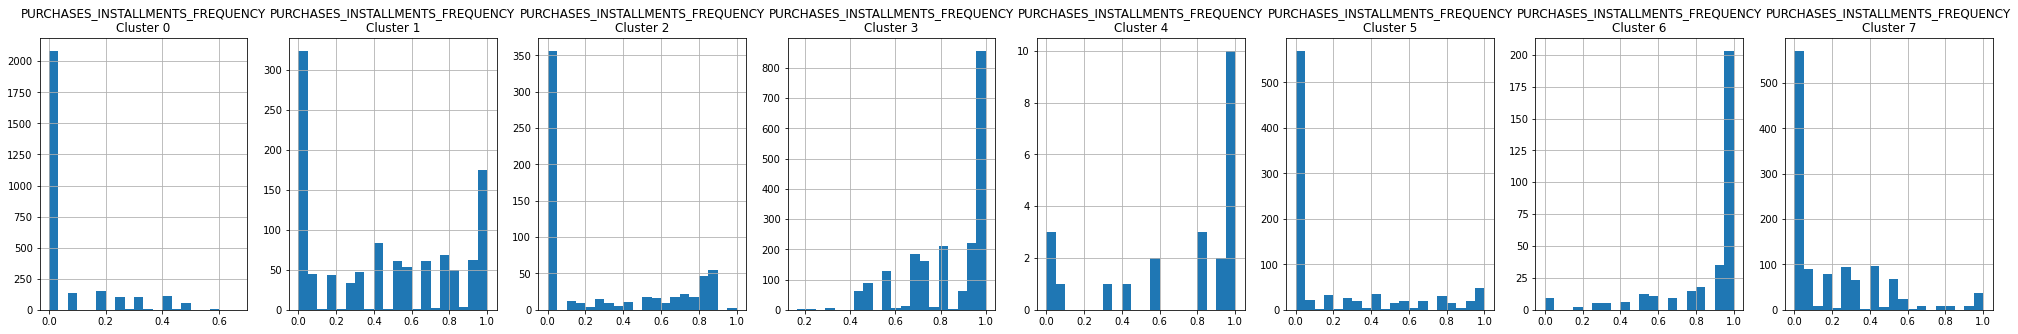

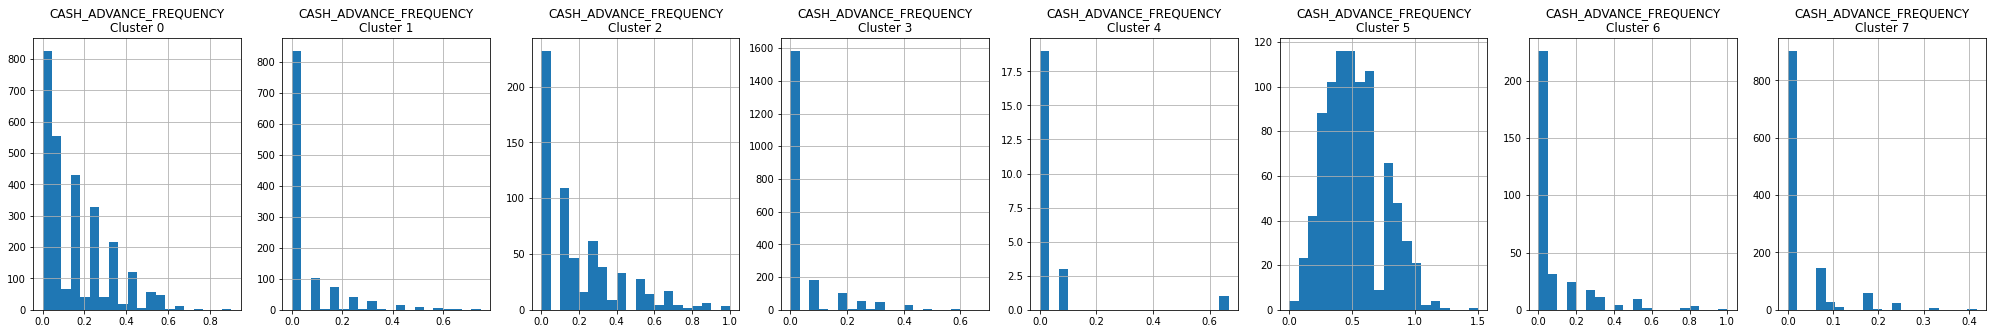

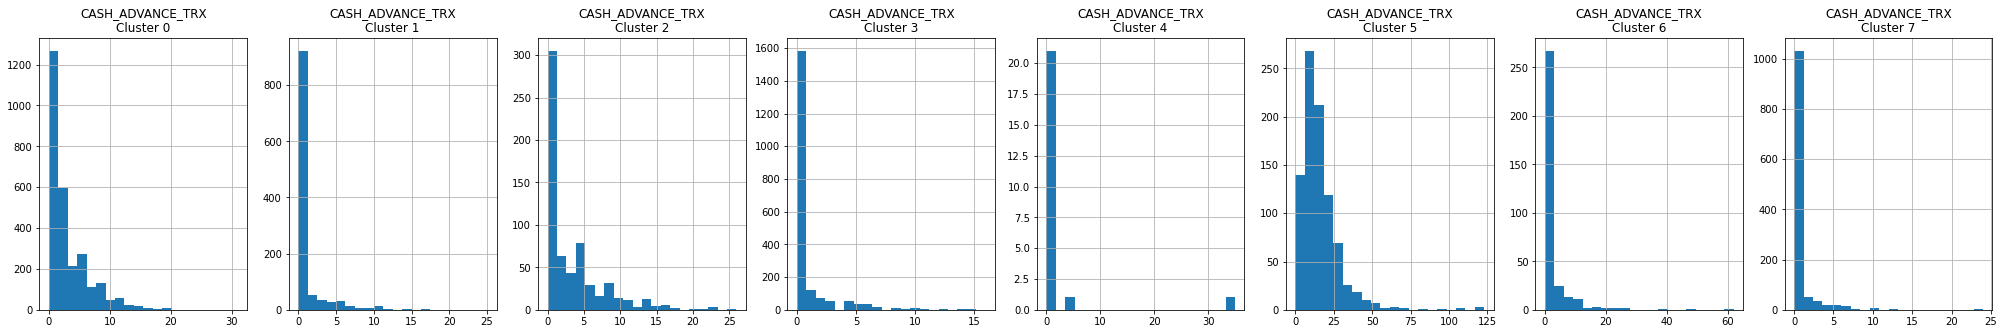

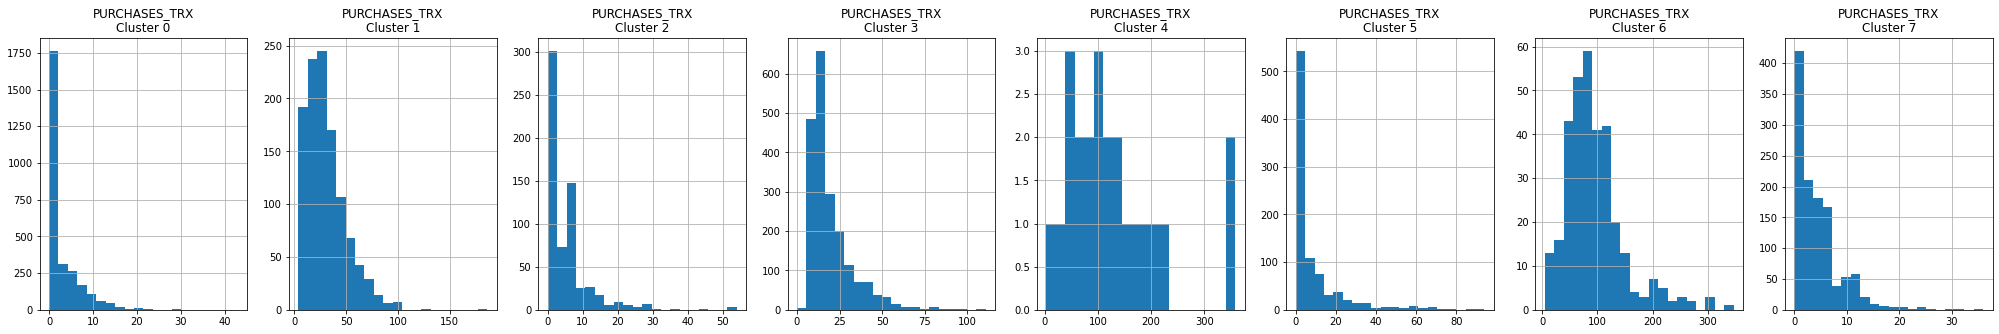

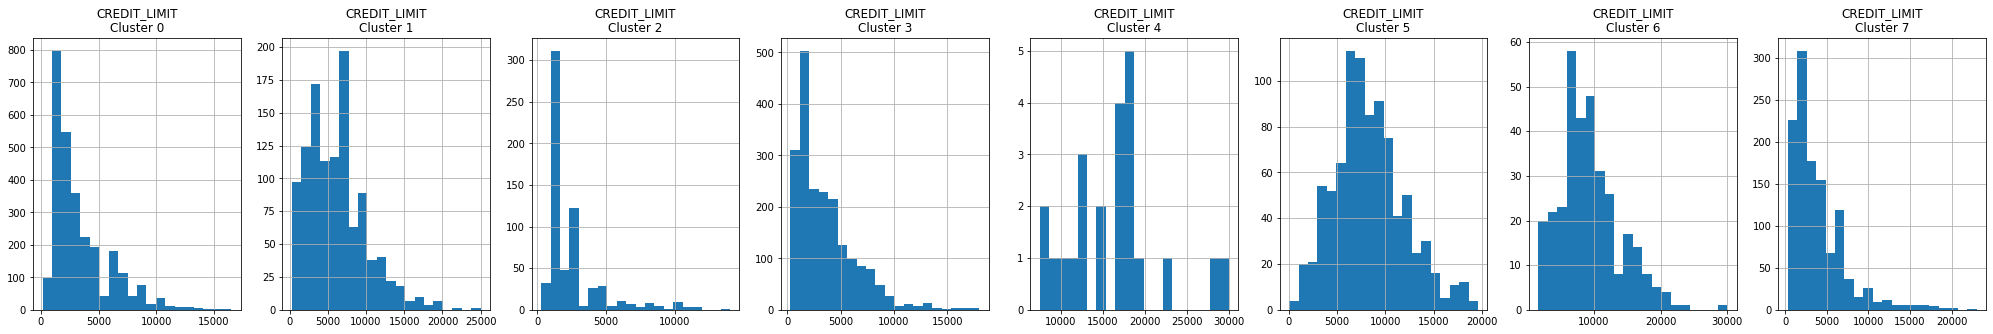

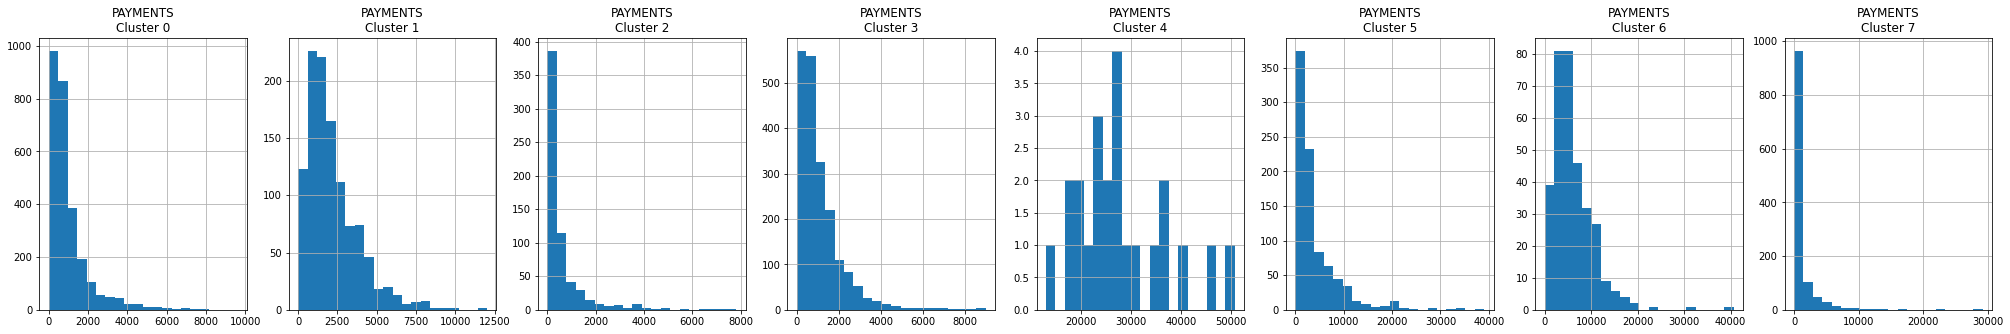

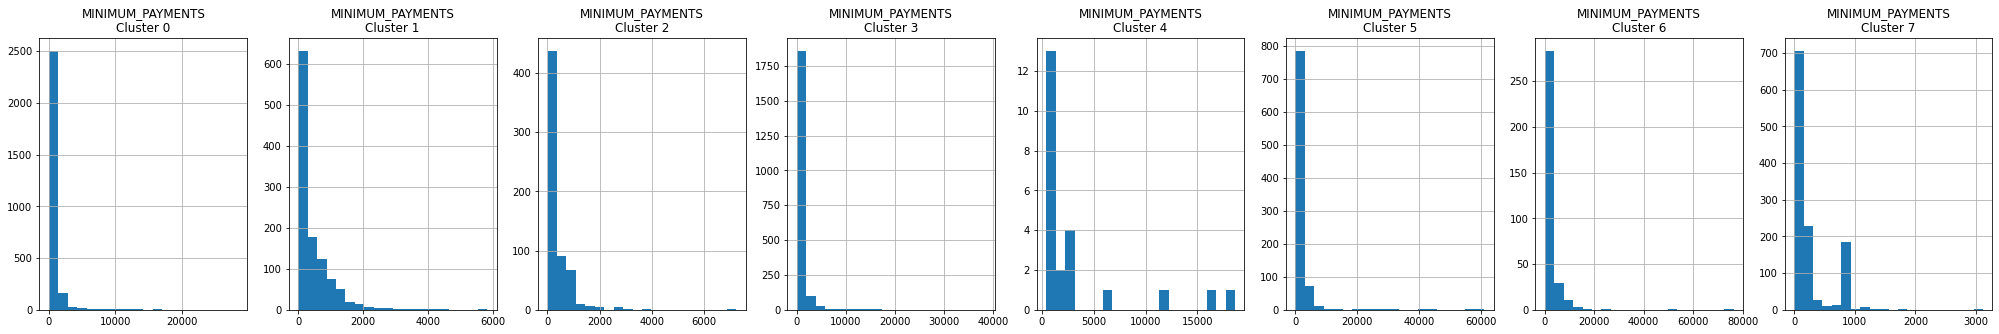

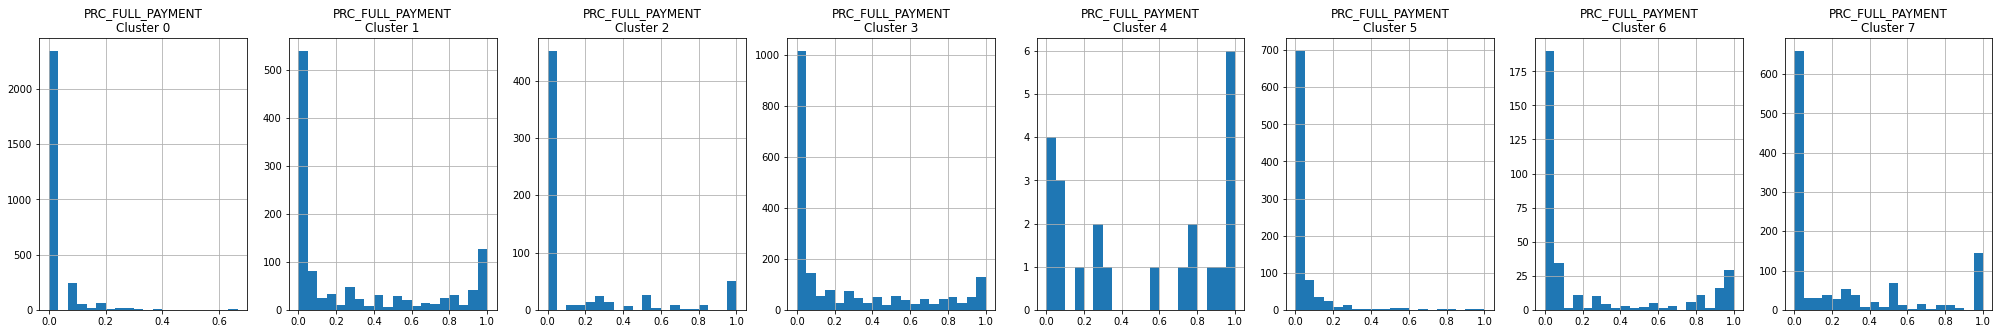

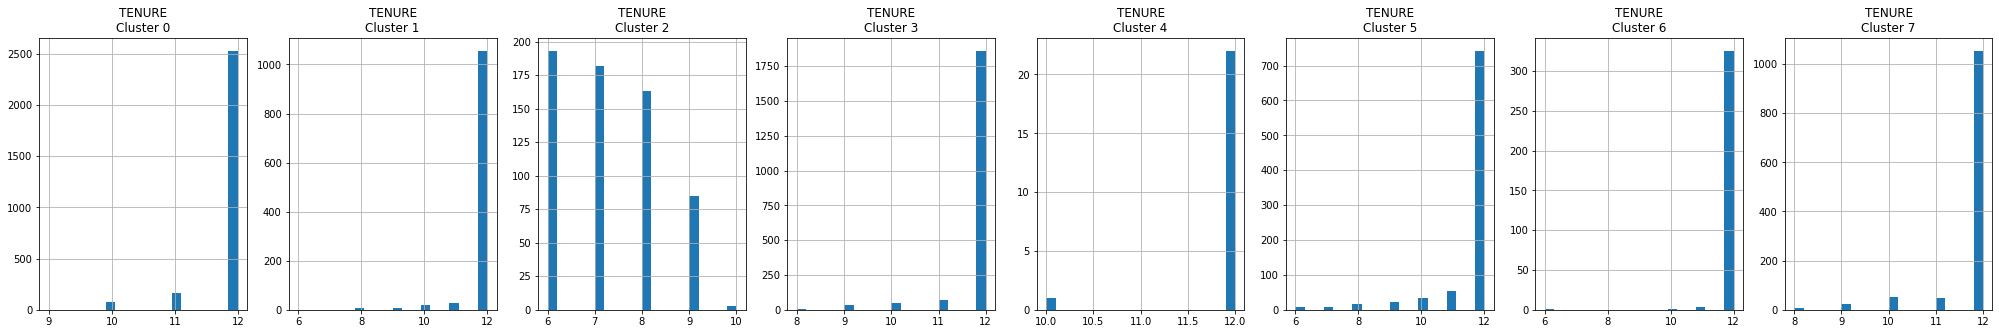

In [48]:
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title('{}\nCluster {}'. format(i,j))
  plt.show()

In [49]:
credit_ordered = df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4234,198.815177,1.000000,247.50,0.00,247.5,0.000000,0.166667,0.000000,0.166667,0.000000,0,3,4000.0,283.508460,249.335824,0.0,12,0
4236,1534.165790,1.000000,0.00,0.00,0.0,635.299075,0.000000,0.000000,0.000000,0.583333,11,0,1800.0,681.290050,439.318862,0.0,12,0
4238,1116.944017,1.000000,182.64,182.64,0.0,109.600359,0.333333,0.333333,0.000000,0.083333,1,4,1500.0,304.822958,347.685591,0.0,12,0
4242,1868.523786,1.000000,27.89,27.89,0.0,47.998873,0.083333,0.083333,0.000000,0.083333,1,2,2000.0,440.707307,517.115912,0.0,12,0


###PCA (Principal Component Analysis)
* PCA é um algoritmo de aprendizagem não supervisionada.

* Aplica redução de dimensionalidade, porém, tenta manter as informações originais com as mesmas características.

* Encontra um novo conjunto de características que são chamadas de componentes.

* Os componentes são criados por meio das características não correlacionadas.

In [50]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222115, -1.0764515 ],
       [-1.13829678,  2.50648178],
       [ 0.96968781, -0.38351488],
       ...,
       [-0.92620451, -1.81079028],
       [-2.33655344, -0.65797181],
       [-0.55642032, -0.40046452]])

In [51]:
df_pca = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])

In [52]:
df_pca

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138297,2.506482
2,0.969688,-0.383515
3,-0.873628,0.043167
4,-1.599435,-0.688583
...,...,...
8945,-0.359630,-2.016150
8946,-0.564370,-1.639128
8947,-0.926205,-1.810790
8948,-2.336553,-0.657972


In [53]:
df_pca = pd.concat([df_pca, pd.DataFrame({'cluster': labels})], axis = 1)
df_pca.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,0
1,-1.138297,2.506482,5
2,0.969688,-0.383515,1
3,-0.873628,0.043167,0
4,-1.599435,-0.688583,0


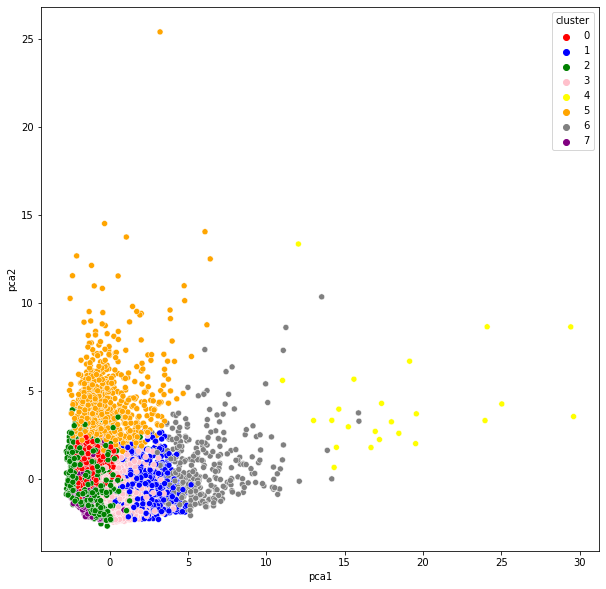

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y ='pca2', hue = 'cluster', data = df_pca, palette=['red', 'blue', 'green', 'pink', 'yellow', 'orange', 'gray', 'purple'])

###Autoencoders - Intuição

Outra alternativa para caso não queira utilizar PCA.

**Autoencoder** é uma classe de arquitetura de rede neural que tem como objetivo aprender como comprimir/reduzir um conjunto de dados (etapa conhecida como **encoder**) e, em seguida, aprende a reconstruir os dados a partir da versão que foi previamente reduzida (etapa conhecida como **decoder**). Espera-se que os dados reconstrúidos sofram alguma perda de informação (preferencialmente mínima) durante o processo (mensurada pela reconstruction loss).

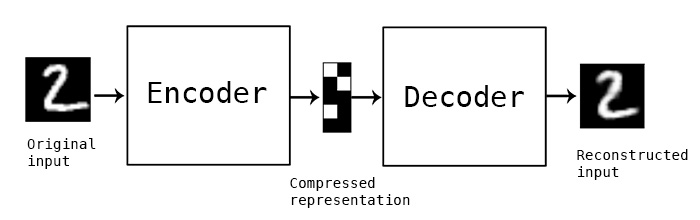


Fonte: [Hacking Analytics](https://hackinganalytics.com/2020/04/02/redes-neurais-autoencoders-feed-forward/)

In [55]:
df_scaled.shape

(8950, 17)

In [66]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from keras.layers import Lambda
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [67]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [68]:
#Autoencoder
autoencoder = Model(input_df, decoded)

In [69]:
#Encoder
encoder = Model(input_df, encoded)

In [70]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [71]:
autoencoder.fit(df_scaled, df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 5s 15ms/step - loss: 0.2414
Epoch 2/50
280/280 [==============================] - 4s 15ms/step - loss: 0.1138
Epoch 3/50
280/280 [==============================] - 4s 15ms/step - loss: 0.1200
Epoch 4/50
280/280 [==============================] - 5s 16ms/step - loss: 0.0711
Epoch 5/50
280/280 [==============================] - 5s 19ms/step - loss: 0.0671
Epoch 6/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0753
Epoch 7/50
280/280 [==============================] - 4s 16ms/step - loss: 0.1429
Epoch 8/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0749
Epoch 9/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0633
Epoch 10/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0562
Epoch 11/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0548
Epoch 12/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0516
Epoch 13/50
2

In [72]:
df_scaled.shape

(8950, 17)

In [73]:
compact = encoder.predict(df_scaled)

In [74]:
compact.shape

(8950, 10)

In [75]:
df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [76]:
compact[0]

array([0.2152161 , 0.        , 0.6489204 , 0.3767104 , 0.        ,
       0.4006949 , 0.54366165, 1.4492242 , 0.        , 0.        ],
      dtype=float32)

In [77]:
wcss_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

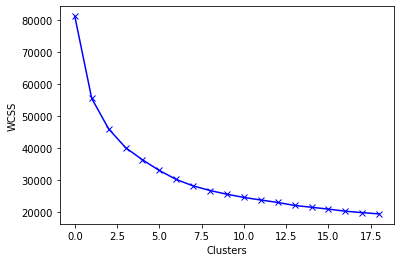

In [79]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

In [ ]:
df_cluster_ordered.tail()

In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')